In [ ]:
import librosa
from scipy.fftpack import fft
import IPython.display as ipd
import matplotlib.pyplot as plt
from librosa import display
import numpy as np
import soundfile as sf
import sklearn
import pandas as pd
import os, wave
import pickle

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#data = '/kaggle/input/covid19-cough-audio-classification/'
#file = "metadata_compiled.csv"

from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/processed_dataset/metadata_compiled.csv')
full_df = df
full_df

Mounted at /content/drive


,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1,quality_2,cough_type_2,dyspnea_2,wheezing_2,stridor_2,choking_2,congestion_2,nothing_2,diagnosis_2,severity_2,quality_3,cough_type_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,diagnosis_3,severity_3,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,43.932829,51.6,-0.2,NaN,female,False,False,symptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,27.702036,-39.0,-68.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,healthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Covid_data = pd.DataFrame()
Covid_data['uuid'] = df['uuid']
Covid_data['status'] = df['status']
Covid_data = Covid_data.dropna()
#Covid_data

In [ ]:
df = Covid_data[Covid_data['status']=="healthy"]
remove_n = 4000
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)
#df_subset


'\nAll of the coughs in the public database that were labeled as COVID-19 \namong the four experts were subsequently pooled together and analyzed for trends in the attributes of the cough recordings. \nThe vast majority of coughs do not exhibit audible dyspnea (93.72%), wheezing (92.43%), stridor (98.71%), choking (99.20%), or nasal congestion (99.03%). \nAdditionally, 86.96% of COVID-19-labeled coughs are annotated as dry, which is consistent with literature stating that a dry cough is a common COVID-19 symptom5,30. \nFinally, 83.58% of these coughs are labeled as mild. These commonalities among COVID-19 labeled coughs reflect the consistency of the database.\n'

In [ ]:
Covid_data  = pd.concat([Covid_data, df_subset])
Covid_data = Covid_data.drop_duplicates(keep=False)
#Covid_data

### For the explode piecharts below refer : https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

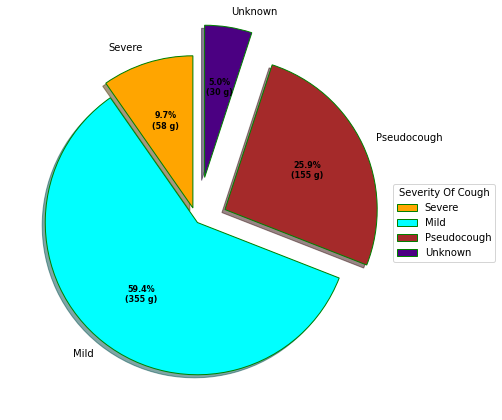

In [ ]:
severity_data = pd.DataFrame()
severity_data['uuid'] = full_df['uuid']
severity_data['severity_4'] = full_df['severity_4']
severity_data.dropna()
severity_data = pd.merge(Covid_data, severity_data, left_on = 'uuid', right_on = 'uuid').drop('status', axis = 1)

#[nan 'mild' 'severe' 'pseudocough' 'unknown']
mild_severity_data = severity_data[severity_data['severity_4'] == 'mild']
mild_severity_index = mild_severity_data.index
mild_severity_count = len(mild_severity_index)

severe_severity_data = severity_data[severity_data['severity_4'] == 'severe']
severe_severity_index = severe_severity_data.index
severe_severity_count = len(severe_severity_index)

psuedo_severity_data = severity_data[severity_data['severity_4'] == 'pseudocough']
psuedo_severity_index = psuedo_severity_data.index
psuedo_severity_count = len(psuedo_severity_index)

unknown_severity_data = severity_data[severity_data['severity_4'] == 'unknown']
unknown_severity_index = unknown_severity_data.index
unknown_severity_count = len(unknown_severity_index)

lbls = ['Severe', 'Mild', 'Pseudocough', 
        'Unknown']
  
data = [severe_severity_count, mild_severity_count, psuedo_severity_count, unknown_severity_count]
  
  
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3)
  
# Creating color parameters
colors = ( "orange", "cyan", "brown","indigo")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = lbls,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, lbls,
          title ="Severity Of Cough",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
#ax.set_title("Customizing pie chart")
  
# show plot
plt.savefig("squares.png")
plt.show()

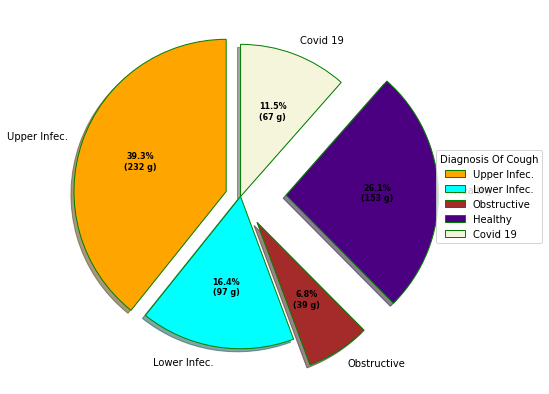

In [ ]:
diagnosis_data = pd.DataFrame()
diagnosis_data['uuid'] = full_df['uuid']
diagnosis_data['diagnosis_4'] = full_df['diagnosis_4']
diagnosis_data.dropna()
diagnosis_data = pd.merge(Covid_data, diagnosis_data, left_on = 'uuid', right_on = 'uuid').drop('status', axis = 1)

#[nan 'upper_infection' 'obstructive_disease' 'lower_infection' 'healthy_cough' 'COVID-19']
upper_diag_data = diagnosis_data[diagnosis_data['diagnosis_4'] == 'upper_infection']
upper_diag_index = upper_diag_data.index
upper_diag_count = len(upper_diag_index)

obstructive_diag_data = diagnosis_data[diagnosis_data['diagnosis_4'] == 'obstructive_disease']
obstructive_diag_index = obstructive_diag_data.index
obstructive_diag_count = len(obstructive_diag_index)

lower_diag_data = diagnosis_data[diagnosis_data['diagnosis_4'] == 'lower_infection']
lower_diag_index = lower_diag_data.index
lower_diag_count = len(lower_diag_index)

healthy_diag_data = diagnosis_data[diagnosis_data['diagnosis_4'] == 'healthy_cough']
healthy_diag_index = healthy_diag_data.index
healthy_diag_count = len(healthy_diag_index)

COVID_diag_data = diagnosis_data[diagnosis_data['diagnosis_4'] == 'COVID-19']
COVID_diag_index = COVID_diag_data.index
COVID_diag_count = len(COVID_diag_index)



lbls = ['Upper Infec.', 'Lower Infec.','Obstructive' , 'Healthy','Covid 19']
data = [upper_diag_count, lower_diag_count, obstructive_diag_count, healthy_diag_count, COVID_diag_count]
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
  
# Creating color parameters
colors = ( "orange", "cyan", "brown","indigo" , "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = lbls,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, lbls,
          title ="Diagnosis Of Cough",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
#ax.set_title("Customizing pie chart")
  
# show plot
#plt.savefig("squares.png")
plt.show()

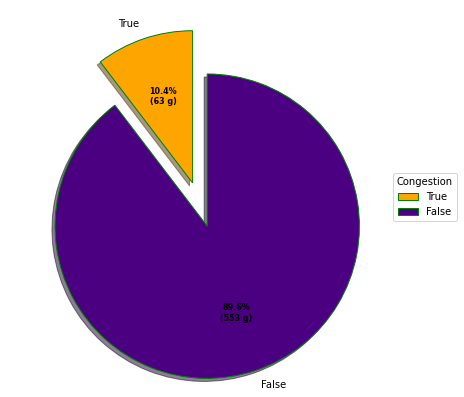

In [ ]:
congestion_data = pd.DataFrame()
congestion_data['uuid'] = full_df['uuid']
congestion_data['congestion_4'] = full_df['congestion_4']
congestion_data.dropna()
congestion_data = pd.merge(Covid_data, congestion_data, left_on = 'uuid', right_on = 'uuid').drop('status', axis = 1)

truecongestion_data = congestion_data[congestion_data['congestion_4'] == True]
truecongestion_index = truecongestion_data.index
truecongestion_count = len(truecongestion_index)

falsecongestion_data = congestion_data[congestion_data['congestion_4'] == False]
falsecongestion_index = falsecongestion_data.index
falsecongestion_count = len(falsecongestion_index)

nullcongestion_data = congestion_data[congestion_data['congestion_4'].isna()]
nullcongestion_index = nullcongestion_data.index
nullcongestion_count = len(nullcongestion_index)


lbls = ['True','False']
data = [truecongestion_count, falsecongestion_count,]
# Creating explode data
explode = (0.1, 0.2)
  
# Creating color parameters
colors = ( "orange", "indigo")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = lbls,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, lbls,
          title ="Congestion",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
#ax.set_title("Customizing pie chart")
  
# show plot
#plt.savefig("squares.png")
plt.show()

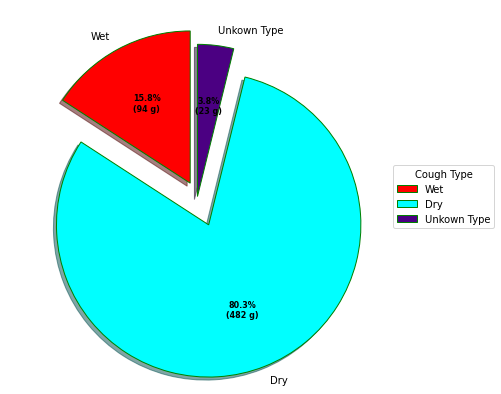

In [ ]:
coughtype_data = pd.DataFrame()
coughtype_data['uuid'] = full_df['uuid']
coughtype_data['cough_type_4'] = full_df['cough_type_4']
coughtype_data.dropna()
coughtype_data = pd.merge(Covid_data, coughtype_data, left_on = 'uuid', right_on = 'uuid').drop('status', axis = 1)

wetcough_data = coughtype_data[coughtype_data['cough_type_4'] == 'wet']
wetcough_index = wetcough_data.index
wetcough_count = len(wetcough_index)

drycough_data = coughtype_data[coughtype_data['cough_type_4'] == 'dry']
drycough_index = drycough_data.index
drycough_count = len(drycough_index)

unknowncough_data = coughtype_data[coughtype_data['cough_type_4'] == 'unknown']
unknowncough_index = unknowncough_data.index
unknowncough_count = len(unknowncough_index)

nullcough_data = coughtype_data[coughtype_data['cough_type_4'].isna()]
nullcough_index = nullcough_data.index
nullcough_count = len(nullcough_index)

lbls = ['Wet','Dry','Unkown Type']
data = [wetcough_count, drycough_count, unknowncough_count]
# Creating explode data
explode = (0.1, 0.2,0.0)
  
# Creating color parameters
colors = ( "red", "cyan","indigo")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = lbls,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, lbls,
          title ="Cough Type",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
#ax.set_title("Customizing pie chart")
  
# show plot
plt.show()

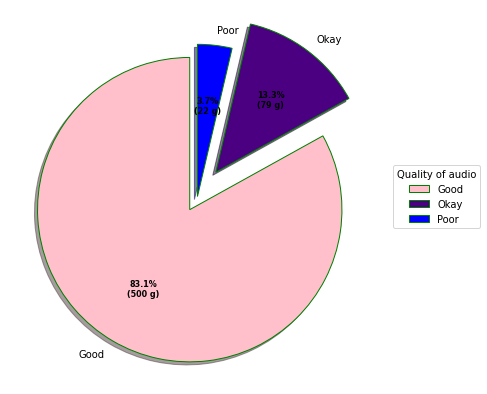

In [ ]:
quality_data = pd.DataFrame()
quality_data['uuid'] = full_df['uuid']
quality_data['quality_4'] = full_df['quality_4']
quality_data.dropna()
quality_data = pd.merge(Covid_data, quality_data, left_on = 'uuid', right_on = 'uuid').drop('status', axis = 1)

poorquality_data = quality_data[quality_data['quality_4'] == 'poor']
poorquality_index = poorquality_data.index
poorquality_count = len(poorquality_index)

okquality_data = quality_data[quality_data['quality_4'] == 'ok']
okquality_index = okquality_data.index
okquality_count = len(okquality_index)

goodquality_data = quality_data[quality_data['quality_4'] == 'good']
goodquality_index = goodquality_data.index
goodquality_count = len(goodquality_index)

nullquality_data = quality_data[quality_data['quality_4'].isna()]
nullquality_index = nullquality_data.index
nullquality_count = len(nullquality_index)

lbls = ['Good','Okay','Poor']
data = [goodquality_count, okquality_count, poorquality_count]
# Creating explode data
explode = (0.1, 0.2,0.0)
  
# Creating color parameters
colors = ( "pink", "indigo","blue")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = lbls,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, lbls,
          title ="Quality of audio",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
#ax.set_title("Customizing pie chart")
  
# show plot
plt.show()